# Analyzing Results of Metalearning Predictions script

In [3]:
file.path('x','y','preds.csv')

[1] "x/y/preds.csv"

In [1]:
options(repr.matrix.max.cols=50, repr.matrix.max.rows=100)

In [2]:
# install.packages("pkgcond")

In [3]:
library(dplyr)
library(data.table)
library(partykit)
library(tictoc)
library(caret)
library(e1071)
library(randomForest)
library(ranger)

#for 3d plotting
library(akima)
library(plotly)

# for prep data
# library(rPython)
library(stringr)
library(pbapply)
library(stringdist)
library(data.table)
library(dominanceanalysis)
library(zoo)


getwd()


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


Loading required package: grid

Loading required package: libcoin

Loading required package: mvtnorm

Loading required package: lattice

Loading required package: ggplot2

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin


The following object is masked from ‘package:dplyr’:

    combine



Attaching package: ‘ranger’


The following object is masked from ‘package:randomForest’:

    importance



Attaching package: ‘plotly’


The following object is masked from ‘package:ggplot2’:

    last_plot


The following object is masked from ‘package:sta

[1] "/home/jupyter/Domains_202003/scripts/phaseII_06_fallbacksupp"

In [4]:
install.packages(c("zoo"))

Installing package into ‘/home/jupyter/.R/library’
(as ‘lib’ is unspecified)



In [5]:

source('../orig/functions.R')

source('../orig/functions_models.R')

source('../phaseII_03_forest/functions_eval.R')



Attaching package: ‘tidyr’


The following object is masked from ‘package:stringdist’:

    extract




In [6]:
source('functions_metalearning.R')

In [7]:
source('load_prep_data_expiry_2.R')

# expiry_df
# expiry_train_df 
# expiry_test_df 
# expiry_list
# expiry_train_list
# expiry_test_list

Loading data...Loaded 5427633 rows
Removing 0 rows due to expiry_date constraints
Removing 758186 rows due to renewed_count constraints
Removing 7716 rows due to missing gibb_score
... now dataset min(creation_date) is  2017-01-01 .


# LOAD output

In [8]:
preds_df <- read.csv('../../data/output/models_20201104/preds.csv')
dim(preds_df)
head(preds_df)

[1] 932289     39

,renewal_type,renewed_count,expiry_date,creation_date,status,domain_id,domain,registrar,reseller,reseller_country,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,sld_length,sld_type,sld_type2,tld,log_reg_arpt,tld_registrar_index,pred_agg_glm_ALL,pred_agg_rf_ALL,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FirstTime,1,2019-11-08,2018-11-08,Active,82167309,viralherbs.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,248714055,auto-renewal,realized,Renewed,2019-11-08,7.5,3.39,viralhealh,2,576,10,l,10l,pw,-0.7339692,pwnamecheap,0.029,0.026318534,0.030,0.027366883,0.049,0.02752752,0.02812901,0.024447474
2,FirstTime,1,2019-08-05,2018-08-05,Active,73624034,ww3n.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,219523016,auto-renewal,unrealized,Not Renewd,2019-08-05,0.0,0.52,ww3n,1,257,4,ln,4ln,pw,-0.7339692,pwnamecheap,0.024,0.023279615,0.024,0.026322543,0.062,0.02930435,0.07347816,0.025803420
3,FirstTime,1,2019-08-11,2018-08-11,Active,74035654,dpasseresp.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,221379481,auto-renewal,unrealized,Not Renewd,2019-08-11,7.0,4.65,pssders,3,353,10,l,10l,pw,-0.7339692,pwnamecheap,0.035,0.006462295,0.035,0.006085356,0.066,0.01232116,0.03516253,0.006186874
4,FirstTime,1,2019-07-22,2018-07-22,Active,72660399,sexgirls.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,216639126,auto-renewal,unrealized,Not Renewd,2019-07-22,7.0,1.75,xgirl,2,80,8,l,8l,pw,-0.7339692,pwnamecheap,0.048,0.075690545,0.048,0.080058013,0.098,0.06522605,0.06273875,0.059190735
5,FirstTime,1,2019-07-07,2018-07-07,Active,71566430,yucief.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,213669206,auto-renewal,unrealized,Not Renewd,2019-07-07,7.0,1.52,cief,3,1147,6,l,6l,pw,-0.7339692,pwnamecheap,0.016,0.011064910,0.017,0.016695967,0.023,0.01608117,0.02273527,0.016375413
6,FirstTime,1,2019-11-11,2018-11-11,Active,82528489,bio-x-keto.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,250798210,auto-renewal,unrealized,Not Renewd,2019-11-11,7.5,2.16,bio-x-keto,1,687,10,hyphen-l,10hyphen-l,pw,-0.7339692,pwnamecheap,0.030,0.009262425,0.031,0.009853222,0.038,0.01404684,0.02211356,0.009443069


## ensure correct nrow()

In [9]:
expiry_test_df %>% dim()

[1] 932347     31

### why preds_df has more rows than expiry_test?

In [10]:
nrow(expiry_test_df)-nrow(preds_df)

[1] 58

In [11]:
# duplicate rows in preds_df? NO
preds_domains <- preds_df %>% distinct(domain_id) %>% pull(domain_id) 
preds_domains %>% length()
# duplicate rows in expiry_test_df (not that this would explain it but just checking)? NO
test_domains <- expiry_test_df %>% distinct(domain_id) %>% pull(domain_id) 
test_domains %>% length()

[1] 932289

[1] 932347

In [12]:
# what are the non-overlapping domain_ids? expiry test_df has 58 domains for which no predictions were generated

test_preds_domains_u <- preds_domains %>% union(test_domains)
length(test_preds_domains_u)
head(test_preds_domains_u)


test_preds_domains_i <- preds_domains %>% intersect(test_domains)
length(test_preds_domains_i)
head(test_preds_domains_i)

[1] 932347

[1] 82167309 73624034 74035654 72660399 71566430 82528489

[1] 932289

[1] 82167309 73624034 74035654 72660399 71566430 82528489

In [13]:
# identify missing preds

setdiff(preds_domains,test_domains)
length(setdiff(preds_domains,test_domains))
cat("\n\n\n")
setdiff(test_domains,preds_domains)
length(setdiff(test_domains,preds_domains))

integer(0)

[1] 0

[1]  70181780  78360794 122049036  74267354 101141084  71066905  83956614
 [8] 116039006  82321649  73736289  91900703  98114119 104026606 101088999
[15]  92905248 104968651  69902250  78686599  73576899  48026450 108131151
[22]  76806449  83956624  78253334  73141264  72570834 118048911 103906916
[29]  77531224  99009174  86079062 102386359  73230044  73786199  99243829
[36] 108660061  69834100 105762741  80956989 113944656  93010773  88054102
[43]  72691074 107426936  91704323  71082385  49087574  71594045  72123374
[50] 102955459  93333378  77731294  71440360  82102184  71455605 118462681
[57]  71238585  75267554

[1] 58

In [14]:
missing_pred_ids <- setdiff(test_domains,preds_domains)
missing_preds_tldreidxs <- expiry_test_df %>% filter(domain_id %in% missing_pred_ids) %>% distinct(tld_registrar_index) %>% pull(tld_registrar_index)
missing_preds_tldreidxs

[1] "spaceinternet gmbh"           "storearvixe"                 
 [3] "online"                       "spaceregister.ca"            
 [5] "pressnicenic"                 "spacearsys"                  
 [7] "onlineimperial registrations" "sitenetclues"                
 [9] "hostrealtime register"        "websiteheart internet"       
[11] "sitewhois networks"           "storeglobal village"         
[13] "fundnc holdings"              "storejogjacamp"              
[15] "storecompra"                  "funtecnocratica centro"      
[17] "storeplanet hoster"           "techfreeparking"             
[19] "pwweb4africa"                 "pwbluehost"                  
[21] "spaceownregistrar"            "funlexsynergy"               
[23] "siteimperial registrations"   "techzhengzhou zitian"        
[25] "pwhosteurope"                 "websitealfahosting"          
[27] "sitecompra"                   "pressregistrator domenov"    
[29] "websitesiteground"            "sitemarkum"                  
[31] "techeukhost"                  "pressascio"                  
[33] "presseasydns"                 "pwimpreza"                   
[35] "funwebnames"                  "websiteneostrada"            
[37] "in.netownregistrar"           "spaceguzel hosting"          
[39] "pressbigrock"                 "techinames"                  
[41] "hostcheck domain"             "storetecnocratica centro"    
[43] "spacecorehub"                 "storeshenzhen hulianxianfeng"
[45] "onlinewhois networks"         "storeinames"                 
[47] "presswebnames"                "storedomain the net"         
[49] "pressarsys"                   "hostredehost"                
[51] "presshome.pl"                 "sitewebonic"

In [15]:
expiry_train_df %>% filter(tld_registrar_index %in% missing_preds_tldreidxs)

renewal_type,renewed_count,expiry_date,creation_date,status,domain_id,domain,registrar,reseller,reseller_country,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,sld_length,sld_type,sld_type2,tld,log_reg_arpt,tld_registrar_index
<chr>,<int>,<date>,<date>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<int>,<int>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<chr>


In [17]:
expiry_test_df %>% filter(tld_registrar_index %in% missing_preds_tldreidxs) %>%  group_by(tld_registrar_index) %>% tally()

tld_registrar_index,n
<chr>,<int>
fundnc holdings,1
funlexsynergy,1
funtecnocratica centro,1
funwebnames,1
hostcheck domain,1
hostrealtime register,2
hostredehost,1
in.netownregistrar,1
online,1


# ASSESS overall model performance
original code in 02_*

In [21]:
head(preds_df)

,renewal_type,renewed_count,expiry_date,creation_date,status,domain_id,domain,registrar,reseller,reseller_country,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,sld_length,sld_type,sld_type2,tld,log_reg_arpt,tld_registrar_index,pred_agg_glm_ALL,pred_agg_rf_ALL,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,FirstTime,1,2019-11-08,2018-11-08,Active,82167309,viralherbs.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,248714055,auto-renewal,realized,Renewed,2019-11-08,7.5,3.39,viralhealh,2,576,10,l,10l,pw,-0.7339692,pwnamecheap,0.029,0.026318534,0.030,0.027366883,0.049,0.02752752,0.02812901,0.024447474
2,FirstTime,1,2019-08-05,2018-08-05,Active,73624034,ww3n.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,219523016,auto-renewal,unrealized,Not Renewd,2019-08-05,0.0,0.52,ww3n,1,257,4,ln,4ln,pw,-0.7339692,pwnamecheap,0.024,0.023279615,0.024,0.026322543,0.062,0.02930435,0.07347816,0.025803420
3,FirstTime,1,2019-08-11,2018-08-11,Active,74035654,dpasseresp.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,221379481,auto-renewal,unrealized,Not Renewd,2019-08-11,7.0,4.65,pssders,3,353,10,l,10l,pw,-0.7339692,pwnamecheap,0.035,0.006462295,0.035,0.006085356,0.066,0.01232116,0.03516253,0.006186874
4,FirstTime,1,2019-07-22,2018-07-22,Active,72660399,sexgirls.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,216639126,auto-renewal,unrealized,Not Renewd,2019-07-22,7.0,1.75,xgirl,2,80,8,l,8l,pw,-0.7339692,pwnamecheap,0.048,0.075690545,0.048,0.080058013,0.098,0.06522605,0.06273875,0.059190735
5,FirstTime,1,2019-07-07,2018-07-07,Active,71566430,yucief.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,213669206,auto-renewal,unrealized,Not Renewd,2019-07-07,7.0,1.52,cief,3,1147,6,l,6l,pw,-0.7339692,pwnamecheap,0.016,0.011064910,0.017,0.016695967,0.023,0.01608117,0.02273527,0.016375413
6,FirstTime,1,2019-11-11,2018-11-11,Active,82528489,bio-x-keto.pw,Namecheap,Namecheap,United States,NA,1,0.48,0.48,0,250798210,auto-renewal,unrealized,Not Renewd,2019-11-11,7.5,2.16,bio-x-keto,1,687,10,hyphen-l,10hyphen-l,pw,-0.7339692,pwnamecheap,0.030,0.009262425,0.031,0.009853222,0.038,0.01404684,0.02211356,0.009443069


In [22]:
tail(preds_df)

,renewal_type,renewed_count,expiry_date,creation_date,status,domain_id,domain,registrar,reseller,reseller_country,registrant_country,reg_period,reg_revenue,reg_arpt,renew_mbg,renewal_item_id,renew_type,autorenew_type,renewal_status,renew_date,renew_arpt,gibb_score,pattern,pattern_domain_count,day_domains,sld_length,sld_type,sld_type2,tld,log_reg_arpt,tld_registrar_index,pred_agg_glm_ALL,pred_agg_rf_ALL,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL
,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<int>,<int>,<int>,<fct>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
932284,FirstTime,1,2020-03-22,2019-03-22,Active,97587294,ipv6v.site,Beijing Guoxu,Beijing Guoxu,China,NA,1,0.75,0.75,0,301881409,auto-renewal,realized,Renewed,2020-03-22,6,0.06,ipv6v,1,1,5,ln,5ln,site,-0.2876821,sitebeijing guoxu,0.126,0.2693520,NA,0.5694559,NA,0.3375556,NA,1
932285,FirstTime,1,2020-08-26,2019-08-26,Active,119460676,xn--4oqv1lwojeqjdk1chnt.site,Beijing Guoxu,Beijing Guoxu,China,NA,1,0.75,0.75,0,340135634,auto-renewal,unrealized,Not Renewd,2020-08-26,6,0.49,xn--4oqv1lwojeqjdk1chnt,1,1,23,idn,23idn,site,-0.2876821,sitebeijing guoxu,0.241,0.1628365,NA,0.4779207,1.000,0.3375556,NA,1
932286,FirstTime,1,2019-12-05,2018-12-05,Active,85970232,t-net.in.net,GMO,Value Domain,Japan,NA,1,2.00,2.00,0,261559291,renewal,NA,Renewed,2019-12-03,6,1.13,t-net,1,1,5,hyphen-l,5hyphen-l,in.net,0.6931472,in.netvalue domain,0.118,0.2902081,0.083,0.1642019,0.431,0.5642647,NA,1
932287,FirstTime,1,2020-03-25,2019-03-25,Active,97815334,sumeru.in.net,GMO,Value Domain,Japan,NA,1,2.00,2.00,0,294310629,renewal,NA,Renewed,2020-02-23,6,6.09,sumeru,1,1,6,l,6l,in.net,0.6931472,in.netvalue domain,0.114,0.6003425,0.078,0.1805670,0.241,0.7431311,NA,1
932288,FirstTime,1,2020-01-08,2019-01-08,Active,90177257,contentking.store,Blacknight,Blacknight,Ireland,NA,1,40.00,40.00,0,267422616,renewal,NA,Renewed,2019-12-18,40,6.38,contentking,1,1,11,l,11l,store,3.6888795,storeblacknight,0.581,0.5783697,NA,0.7555101,1.000,0.3679105,NA,0
932289,FirstTime,1,2019-11-01,2018-11-01,Active,81252319,dtiq.pw,DNC Holdings,DNC Holdings,United States,NA,1,15.00,15.00,0,231660756,renewal,NA,Renewed,2019-09-17,15,0.30,dtiq,1,1,4,l,4l,pw,2.7080502,pwdnc holdings,0.321,0.6866667,NA,0.6832616,0.481,0.1687236,NA,0


In [23]:
preds_df %>% filter(is.na(pred_agg_glm_ALL)) %>% nrow()

[1] 0

In [24]:

lift_list <- list()
auc_list <- list()

fallback_lift <- chart_lift(pred_df=preds_df,
                        dep_var = "renewal_status",
                        pred_var = "pred_agg_glm_ALL") 

lift_list[["fallback"]] <- fallback_lift
auc_list[["fallback"]] <- calc_auc(lift_df=fallback_lift)

models <- c('pred_agg_glm_ALL','pred_agg_rf_ALL','pred_agg_glm','pred_agg_rf',
            'pred_seg_glm_ALL', 'pred_seg_rf_ALL','pred_seg2_glm_ALL','pred_seg2_rf_ALL')


for (model in models){
    model_lift <- chart_lift(pred_df=preds_df,
                        dep_var = "renewal_status",
                        pred_var = model) 
    
    fallback_lift <- merge(fallback_lift, model_lift, by=c("P"),all= TRUE, 
                           suffixes = c("",
                                        paste("_",gsub("pred_df_", "", model)) ))
    
    lift_list[[model]] <- model_lift
    auc_list[[model]] <- calc_auc(lift_df=model_lift)
}

lift_df <- fallback_lift

In [25]:
length(lift_list)
names(lift_list)
sapply(lift_list, dim)
lift_list["pred_agg_glm_ALL"]

[1] 9

[1] "fallback"          "pred_agg_glm_ALL"  "pred_agg_rf_ALL"  
[4] "pred_agg_glm"      "pred_agg_rf"       "pred_seg_glm_ALL" 
[7] "pred_seg_rf_ALL"   "pred_seg2_glm_ALL" "pred_seg2_rf_ALL"

fallback,pred_agg_glm_ALL,pred_agg_rf_ALL,pred_agg_glm,pred_agg_rf,pred_seg_glm_ALL,pred_seg_rf_ALL,pred_seg2_glm_ALL,pred_seg2_rf_ALL
10,10,10,10,10,10,10,10,10
4,4,4,4,4,4,4,4,4


P,actu_renwd2,gain,lift
<dbl>,<int>,<dbl>,<dbl>
0.1,38743,0.4651411,4.651411
0.2,55723,0.6689998,3.344999
0.3,66643,0.8001032,2.667011
0.4,72913,0.8753797,2.188449
0.5,77180,0.9266085,1.853217
0.6,80309,0.9641747,1.606958
0.7,82033,0.9848727,1.406961
0.8,82911,0.9954138,1.244267
0.9,83165,0.9984633,1.109404


In [26]:
lift_list[[1]] <- NULL
auc_list[[1]] <- NULL

In [27]:
prop.table(table(expiry_test_df$renewal_status))


Not Renewd    Renewed 
0.91062984 0.08937016 

In [28]:
plot_multigains <- function (lift_df_list=list(seg_glm = lift_df, 
                                               ben_dtr = lift_df_2),
                             auc_list = list(seg_glm = auc, 
                                             ben_dtr=auc_2),
                             prop_positive = 0.1121167) {
  
  optimal_df <- data.frame( "P"=c(0,prop_positive,1.0),
                            "actu_renwd2"=c(NA,NA,NA),
                            "gain"=c(0,1.0,1.0),
                            "lift"=c(NA,NA,NA))
  
  lift_df_list <- lapply(lift_df_list, function(df) {
    df <- df %>%
      add_row(P = 0, gain =0) %>%
      arrange(P)
  })

  auc_lift_list = paste(lapply(auc_list, round, 3),sapply(lift_df_list, function(x) round(x[2,"lift"],2)), sep=", ")
  
  auc_map = paste(names(lift_df_list),auc_lift_list, sep=" = ")[1:length(lift_df_list)]
  
  
  gains_plot <- ggplot(NULL, aes(P,  gain)) +
    geom_line(data = lift_df_list[[1]] %>% slice(1, n())) +
    
    list(geom_line(data=optimal_df), geom_point(data=optimal_df)) +
    
    scale_y_continuous(breaks = seq(0, 1, by = .1), limits = c(0,1)) +
    scale_x_continuous(breaks = seq(0, 1, by = .1)) +
    labs(title = "Cumulative Gains Plot",
         y = "Cumulative Gain",
         x = "Percentile")+
    theme(text = element_text(size=20))
  
  for(i in seq(length(lift_df_list))){
    name = names(lift_df_list)[[i]]
    df = lift_df_list[[i]]
    auc = auc_list[[i]]
    gains_plot <- gains_plot + list(geom_line(data=df), 
                                    geom_point(data=df))+ 
      annotate("text", x = .35, y = .75-i*.075, hjust = 0, label = auc_map[[i]], size = 6)
  }
  
  
  return(gains_plot)
}


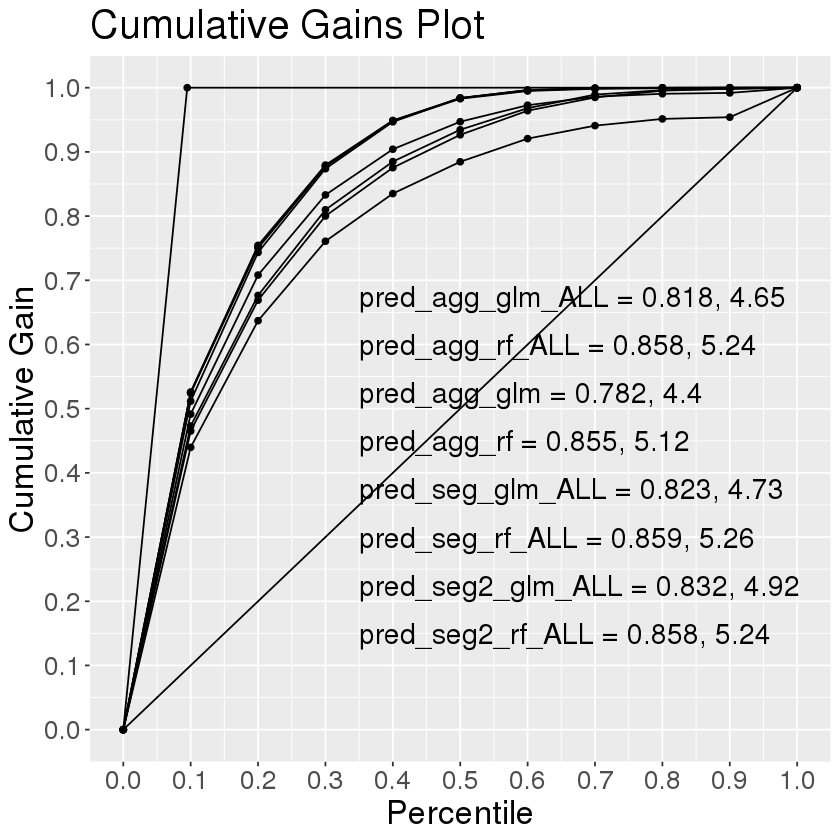

In [29]:
plot_multigains(            lift_df_list=lift_list,
                             auc_list = auc_list,
                             prop_positive = 0.08937016) 

In [30]:
lift_df_10 <- lift_df %>% filter(P==0.1) %>% select(contains("lift_")) %>% t()
lift_df_10

lift_ pred_agg_glm_ALL,4.651411
lift_ pred_agg_rf_ALL,5.244138
lift_ pred_agg_glm,4.397608
lift_ pred_agg_rf,5.116877
lift_ pred_seg_glm_ALL,4.730289
lift_ pred_seg_rf_ALL,5.259986
lift_ pred_seg2_glm_ALL,4.915059
lift_ pred_seg2_rf_ALL,5.243538


In [31]:
(5.244138-4.915059)/4.915059

[1] 0.06695321

In [32]:
auc_list

$pred_agg_glm_ALL
[1] 0.8179157

$pred_agg_rf_ALL
[1] 0.8579238

$pred_agg_glm
[1] 0.7824313

$pred_agg_rf
[1] 0.8554855

$pred_seg_glm_ALL
[1] 0.8230398

$pred_seg_rf_ALL
[1] 0.8587042

$pred_seg2_glm_ALL
[1] 0.8324979

$pred_seg2_rf_ALL
[1] 0.8577413

In [33]:
(auc_list$pred_agg_rf_ALL-auc_list$pred_seg2_glm_ALL)/(auc_list$pred_seg2_glm_ALL)

[1] 0.0305417

In [28]:
confusionMatrix(as.factor(ifelse(preds_df$pred_agg_rf_ALL > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")

Confusion Matrix and Statistics

            Reference
Prediction   Not Renewd Renewed
  Not Renewd     653458   11301
  Renewed        195538   71992
                                         
               Accuracy : 0.7781         
                 95% CI : (0.7773, 0.779)
    No Information Rate : 0.9107         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.3174         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.86432        
            Specificity : 0.76968        
         Pos Pred Value : 0.26910        
         Neg Pred Value : 0.98300        
             Prevalence : 0.08934        
         Detection Rate : 0.07722        
   Detection Prevalence : 0.28696        
      Balanced Accuracy : 0.81700        
                                         
       'Positive' Class : Renewed        
         

In [29]:
confusionMatrix(as.factor(ifelse(preds_df$pred_seg2_glm_ALL > 0.08937016, "Renewed", "Not Renewd")), 
                preds_df$renewal_status, positive="Renewed")

Confusion Matrix and Statistics

            Reference
Prediction   Not Renewd Renewed
  Not Renewd     659137   15715
  Renewed        188174   67229
                                        
               Accuracy : 0.7808        
                 95% CI : (0.78, 0.7817)
    No Information Rate : 0.9108        
    P-Value [Acc > NIR] : 1             
                                        
                  Kappa : 0.3037        
                                        
 Mcnemar's Test P-Value : <2e-16        
                                        
            Sensitivity : 0.81053       
            Specificity : 0.77792       
         Pos Pred Value : 0.26323       
         Neg Pred Value : 0.97671       
             Prevalence : 0.08916       
         Detection Rate : 0.07227       
   Detection Prevalence : 0.27455       
      Balanced Accuracy : 0.79423       
                                        
       'Positive' Class : Renewed       
                             

In [21]:
str(preds_df$pred_agg_rf_ALL)

 num [1:932289] 0.02632 0.02328 0.00646 0.07569 0.01106 ...


# Why 58 missing domain_ids in preds_df.. is it a merge issue?
No... individual preds have the same number of rows as the final, merged df

In [34]:
fullDir='/home/jupyter/Domains_202003/data/output/models_20201104'

In [35]:
load(file.path(fullDir, 'preds_seg_rf_ALL.RData'))
load(file.path(fullDir, 'preds_seg_glm_ALL.RData'))
load(file.path(fullDir, 'preds_agg_rf.RData'))
load(file.path(fullDir, 'preds_agg_rf_ALL.RData'))
load(file.path(fullDir, 'preds_agg_glm.RData'))
load(file.path(fullDir, 'preds_agg_glm_ALL.Rdata'))
load(file.path(fullDir, 'preds_seg2_rf_ALL.RData'))
load(file.path(fullDir, 'preds_seg2_glm_ALL.RData'))


In [38]:
length(preds_seg2_rf_ALL)
length(preds_seg2_glm_ALL)
length(preds_seg_rf_ALL)
length(preds_seg_glm_ALL)
length(preds_agg_rf_ALL)
length(preds_agg_glm_ALL)
length(preds_agg_rf)
length(preds_agg_glm)

[1] 2109

[1] 2109

[1] 2109

[1] 2109

[1] 2109

[1] 2109

[1] 2109

[1] 2109

In [44]:
length(na.omit(preds_seg2_rf_ALL))
length(preds_seg2_rf_ALL[!is.na(preds_seg2_rf_ALL)])

[1] 2109

[1] 1706

In [42]:
preds_seg2_rf_ALL[[323]]

[1] NA

In [47]:
nrow(rbindlist(preds_seg2_rf_ALL[!is.na(preds_seg2_rf_ALL)]))
nrow(rbindlist(preds_seg_rf_ALL[!is.na(preds_seg_rf_ALL)]))
nrow(rbindlist(preds_agg_rf_ALL[!is.na(preds_agg_rf_ALL)]))
nrow(rbindlist(preds_agg_rf[!is.na(preds_agg_rf)]))

nrow(rbindlist(preds_seg2_glm_ALL[!is.na(preds_seg2_glm_ALL)]))
nrow(rbindlist(preds_seg_glm_ALL[!is.na(preds_seg_glm_ALL)]))
nrow(rbindlist(preds_agg_glm_ALL[!is.na(preds_agg_glm_ALL)]))
nrow(rbindlist(preds_agg_glm[!is.na(preds_agg_glm)]))

[1] 932289

[1] 932289

[1] 932289

[1] 932289

[1] 932289

[1] 932289

[1] 932289

[1] 932289

In [48]:
str(preds_df)

'data.frame':	932289 obs. of  39 variables:
 $ renewal_type        : Factor w/ 1 level "FirstTime": 1 1 1 1 1 1 1 1 1 1 ...
 $ renewed_count       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ expiry_date         : Factor w/ 458 levels "2019-06-01","2019-06-02",..: 161 66 72 52 37 164 38 66 426 440 ...
 $ creation_date       : Factor w/ 971 levels "2017-01-01","2017-01-02",..: 674 579 585 565 550 677 551 579 939 953 ...
 $ status              : Factor w/ 1 level "Active": 1 1 1 1 1 1 1 1 1 1 ...
 $ domain_id           : int  82167309 73624034 74035654 72660399 71566430 82528489 71611449 73625689 114900256 117910336 ...
 $ domain              : Factor w/ 932172 levels "0-0.website",..: 837672 876376 232903 708671 912501 120268 778383 313500 106165 860143 ...
 $ registrar           : Factor w/ 159 levels "1&1 Internet",..: 91 91 91 91 91 91 91 91 91 91 ...
 $ reseller            : Factor w/ 315 levels "1&1 Internet",..: 184 184 184 184 184 184 184 184 184 184 ...
 $ reseller_country    : Factor w/ 5